In [ ]:
import sys
import os
import random
import json
import matplotlib.pyplot as plt
import numpy as np
# Add the parent directory of AAC/ to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from PDAC.pdac_scheduling_ilp import solve_pdac_ilp
from PDAC.pdac_scheduling_lp import solve_pdac_lp
from AAC.aac_scheduling_greedy import solve_aac_greedy
from AAC.aac_scheduling_ilp import solve_aac_ilp

In [2]:
start_time = 0
end_time = 1400
max_length = 700
# batch_size = 50

start_size = 10
end_size = 100
step_size = 10

In [3]:
"""
Resources -> This is a list that keeps track of the amount of available resources at each time step

    - The resource curve information will be gathered from the Data/ folder.
"""
# Instantiate the resource curve
path = '../../Input_Data/solar_data.json'
with open(path, 'r') as file:
    data = json.load(file)

wind_energy = data['series'][1]['data']
solar_energy = data['series'][2]['data']
hydro_energy = data['series'][3]['data']

# Have 165 hours and you want minute by minute resolution. Therefore the total length of this list needs to be 165 * 60 in length
# The first 60 values of the list need to equal 0, the next need to equal 1. Therefore, i // 60
wind_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(wind_energy_7_days)):
    wind_energy_7_days[i] = wind_energy[ i // 60 ]['value']

solar_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(solar_energy_7_days)):
    solar_energy_7_days[i] = solar_energy[ i // 60 ]['value']

hydro_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(hydro_energy_7_days)):
    hydro_energy_7_days[i] = hydro_energy[ i // 60 ]['value']


total = []
for i in range(165 * 60):
    total_sum = wind_energy_7_days[i] + solar_energy_7_days[i] + hydro_energy_7_days[i]
    total.append(total_sum)

day = 3
resources = total[(24 * day) + start_time : (24 * day) + end_time]

# # Implement a resource curve scaling factor to better fit the jobs
scale_factor = 0.05
resources = [r * scale_factor for r in resources]

In [ ]:
# This is The list of job objects that will be scheduled
# They each have a release, deadline, duration and height
path = '../../Input_Data/job_data.json'
with open(path, 'r') as file:
    data = json.load(file)

# Randomly shuffle the jobs so that there is variation between trials
jobs_array = data['jobs']

inexact = []
exact = []

aac_exact = []
greedy = []

for batch_size in range(start_size, end_size, step_size):
    random.shuffle(jobs_array)

    i = solve_pdac_lp(jobs_array, resources, start_time, end_time, max_length, batch_size)
    e = solve_pdac_ilp(jobs_array, resources, start_time, end_time, max_length, batch_size)

    g = solve_aac_greedy(jobs_array, resources, start_time, end_time, max_length, batch_size)
    ae = solve_aac_ilp(jobs_array, resources, start_time, end_time, max_length, batch_size)

    inexact.append(i)
    exact.append(e)

    greedy.append(g)
    aac_exact.append(ae)


start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve
start solve
end solve


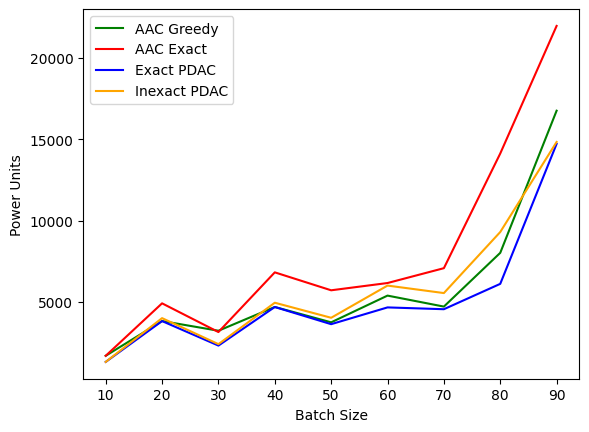

In [5]:
job_graph_xvalues = np.array([i for i in range(start_size, end_size, step_size)])

plt.plot(job_graph_xvalues, greedy, label="AAC Greedy", color='green')
plt.plot(job_graph_xvalues, aac_exact, label="AAC Exact", color='red')
plt.plot(job_graph_xvalues, exact, label="Exact PDAC", color='blue')
plt.plot(job_graph_xvalues, inexact, label="Inexact PDAC", color='orange')

plt.xlabel("Batch Size")
plt.ylabel("Power Units")
plt.legend()
plt.show()